## In this notebook we will 
1) import the data and try to see if and how many seasonalities exist

2) try to see which model and why is the best in our case and 

3) implement the model and do the forecasting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
## function to fomat the data
def data_format(df):
    df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective','updated_time','website_ctr_link_click'],axis=1)
    df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
    df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
    df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
    df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
    df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
    df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
    df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
    df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
    df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
    df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
    df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
    df=df.rename(columns={'actions_mobile_app_install':'mobile_conv'})
    df=df.rename(columns={'actions_omni_app_install':'all_conv'})
    df['CR']=round((df.mobile_conv/df.clicks) *100, 2)
    df['CTR']=round((df.clicks / df.impressions) * 100,4)
    df['CPC']= round(df.spend / df.clicks,2)
    df['costPerCon'] = round(df.spend / df.mobile_conv, 2)
    df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

    df=df.dropna(subset=['time'])
    df.time=df.time.replace('00:00:00 - 00:59:59',1)
    df.time=df.time.replace('01:00:00 - 01:59:59',2)
    df.time=df.time.replace('02:00:00 - 02:59:59',3)
    df.time=df.time.replace('03:00:00 - 03:59:59',4)
    df.time=df.time.replace('04:00:00 - 04:59:59',5)
    df.time=df.time.replace('05:00:00 - 05:59:59',6)
    df.time=df.time.replace('06:00:00 - 06:59:59',7)
    df.time=df.time.replace('07:00:00 - 07:59:59',8)
    df.time=df.time.replace('08:00:00 - 08:59:59',9)
    df.time=df.time.replace('09:00:00 - 09:59:59',10)
    df.time=df.time.replace('10:00:00 - 10:59:59',11)
    df.time=df.time.replace('11:00:00 - 11:59:59',12)
    df.time=df.time.replace('12:00:00 - 12:59:59',13)
    df.time=df.time.replace('13:00:00 - 13:59:59',14)
    df.time=df.time.replace('14:00:00 - 14:59:59',15)
    df.time=df.time.replace('15:00:00 - 15:59:59',16)
    df.time=df.time.replace('16:00:00 - 16:59:59',17)
    df.time=df.time.replace('17:00:00 - 17:59:59',18)
    df.time=df.time.replace('18:00:00 - 18:59:59',19)
    df.time=df.time.replace('19:00:00 - 19:59:59',20)
    df.time=df.time.replace('20:00:00 - 20:59:59',21)
    df.time=df.time.replace('21:00:00 - 21:59:59',22)
    df.time=df.time.replace('22:00:00 - 22:59:59',23)
    df.time=df.time.replace('23:00:00 - 23:59:59',24)
    
    df['day']=pd.to_datetime(df['date_start']).dt.day
    df['Time']=df['time']#+24*(df['day']-1)
    
    df['week']=pd.to_datetime(df['date_start']).dt.week
    df['day_of_week']=pd.to_datetime(df['date_start']).dt.dayofweek
    df.drop(df.tail(1).index,inplace = True)
    return df
def timing_analysis(df):
    grouped = pd.DataFrame(df.groupby(['Time','day'])['mobile_conv'].sum().reset_index())
    plot = sns.lineplot(x='Time', y='mobile_conv', data=grouped)
    return plot, grouped
file='../Timing Analysis/data/ad_Aug_hourly_advertiser_time.csv'
df=pd.read_csv(file)

df=data_format(df)


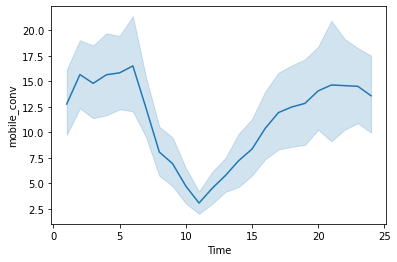

In [4]:
plot,grouped=timing_analysis(df)

### In our dataset there are different campaign ids, but since for the moment we do not have a lot of data we will just use all the information. In the future this should be change and we will have seperate analysis for each campaign id

#### There are the following time data in our dataset and we will try to see if there is seasonality n any of those.
1) is the hour of the day (24)

2) is the day of the week (7)

3) is the week of the month (4)

4) is the day of the month (30)

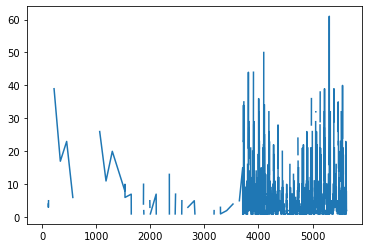

In [48]:
plt.plot('mobile_conv', data=df)

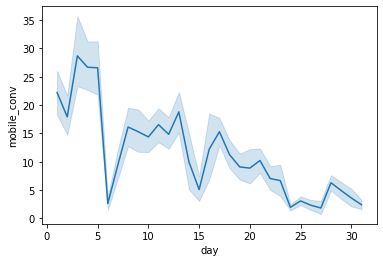

In [58]:
grouped = pd.DataFrame(df.groupby(['day','Time'])['mobile_conv'].sum().reset_index())
sns.lineplot(x='day', y='mobile_conv', data=grouped)

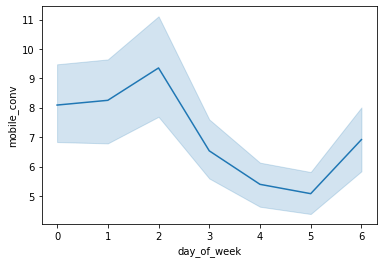

In [67]:
sns.lineplot(x='day_of_week', y='mobile_conv', data=df)

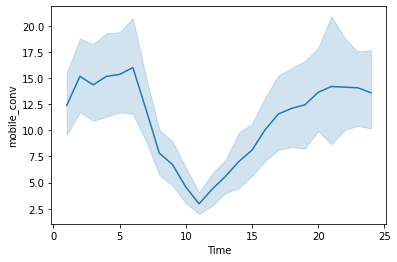

In [63]:
grouped = pd.DataFrame(df.groupby(['day','Time','week'])['mobile_conv'].sum().reset_index())
sns.lineplot(x='Time', y='mobile_conv', data=grouped)

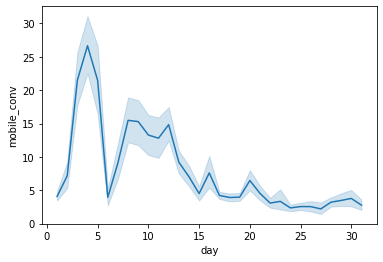

In [61]:
sns.lineplot(x='day', y='mobile_conv', data=df)

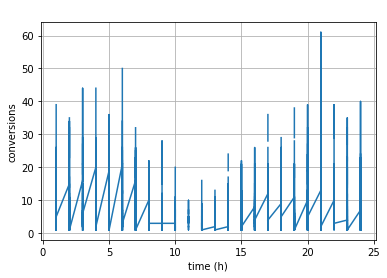

In [49]:

fig, ax = plt.subplots()
ax.plot(df.Time, df.mobile_conv)

ax.set(xlabel='time (h)', ylabel='conversions',
       title=' ')
ax.grid()

plt.show()